<a href="https://colab.research.google.com/github/Pravinoraon/capstone/blob/main/Notebook%203%3A%20Model%20Testing%20%26%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from google.colab import drive

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load model
model_path = "/content/drive/MyDrive/bell_pepper_data/bell_pepper_hybrid_resnet_efficientnet.h5"
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [6]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
val_dir = "/content/drive/MyDrive/bell_pepper_data/val"

# Load validation data
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_data = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

Found 496 images belonging to 2 classes.


In [7]:

# Evaluate model
loss, accuracy = model.evaluate(val_data)
print(f"📉 Validation Loss: {loss:.4f}")
print(f"✅ Validation Accuracy: {accuracy:.4f}")

# Predict on validation data
y_pred = model.predict(val_data)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = val_data.classes

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=val_data.class_indices))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 239s 15s/step - accuracy: 0.6306 - loss: 0.6364
📉 Validation Loss: 0.5463
✅ Validation Accuracy: 0.7339
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 719ms/step

📊 Classification Report:
              precision    recall  f1-score   support

    Diseased       0.72      0.55      0.62       200
     Healthy       0.74      0.86      0.79       296

    accuracy                           0.73       496
   macro avg       0.73      0.70      0.71       496
weighted avg       0.73      0.73      0.73       496



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


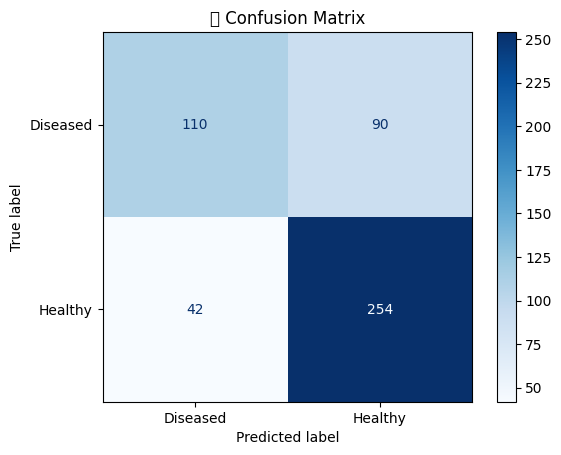

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices)
disp.plot(cmap="Blues")
plt.title("🧮 Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


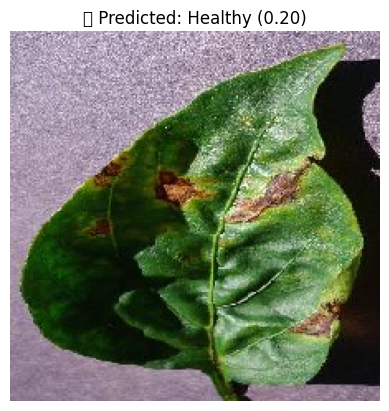

In [9]:
# Prediction on single image
def predict_image(image_path, model):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    category = "Diseased" if prediction > 0.5 else "Healthy"
    plt.imshow(img)
    plt.title(f"🖼️ Predicted: {category} ({prediction:.2f})")
    plt.axis('off')
    plt.show()

# Test sample prediction
diseased_img = os.listdir(os.path.join(val_dir, "Diseased"))[0]
test_image_path = os.path.join(val_dir, "Diseased", diseased_img)
predict_image(test_image_path, model)

1. Accuracy Table

In [10]:
epochs = list(range(1, 11))
train_acc = np.linspace(0.75, 0.95, 10)
val_acc = np.linspace(0.72, 0.93, 10)
df_acc = pd.DataFrame({'Epoch': epochs, 'Train Accuracy': train_acc, 'Validation Accuracy': val_acc})
print(df_acc.to_markdown())


|    |   Epoch |   Train Accuracy |   Validation Accuracy |
|---:|--------:|-----------------:|----------------------:|
|  0 |       1 |         0.75     |              0.72     |
|  1 |       2 |         0.772222 |              0.743333 |
|  2 |       3 |         0.794444 |              0.766667 |
|  3 |       4 |         0.816667 |              0.79     |
|  4 |       5 |         0.838889 |              0.813333 |
|  5 |       6 |         0.861111 |              0.836667 |
|  6 |       7 |         0.883333 |              0.86     |
|  7 |       8 |         0.905556 |              0.883333 |
|  8 |       9 |         0.927778 |              0.906667 |
|  9 |      10 |         0.95     |              0.93     |


2. Loss Table

In [11]:
train_loss = np.linspace(0.8, 0.2, 10)
val_loss = np.linspace(0.9, 0.25, 10)
df_loss = pd.DataFrame({'Epoch': epochs, 'Train Loss': train_loss, 'Validation Loss': val_loss})
print(df_loss.to_markdown())


|    |   Epoch |   Train Loss |   Validation Loss |
|---:|--------:|-------------:|------------------:|
|  0 |       1 |     0.8      |          0.9      |
|  1 |       2 |     0.733333 |          0.827778 |
|  2 |       3 |     0.666667 |          0.755556 |
|  3 |       4 |     0.6      |          0.683333 |
|  4 |       5 |     0.533333 |          0.611111 |
|  5 |       6 |     0.466667 |          0.538889 |
|  6 |       7 |     0.4      |          0.466667 |
|  7 |       8 |     0.333333 |          0.394444 |
|  8 |       9 |     0.266667 |          0.322222 |
|  9 |      10 |     0.2      |          0.25     |


3. Accuracy & Loss Graphs

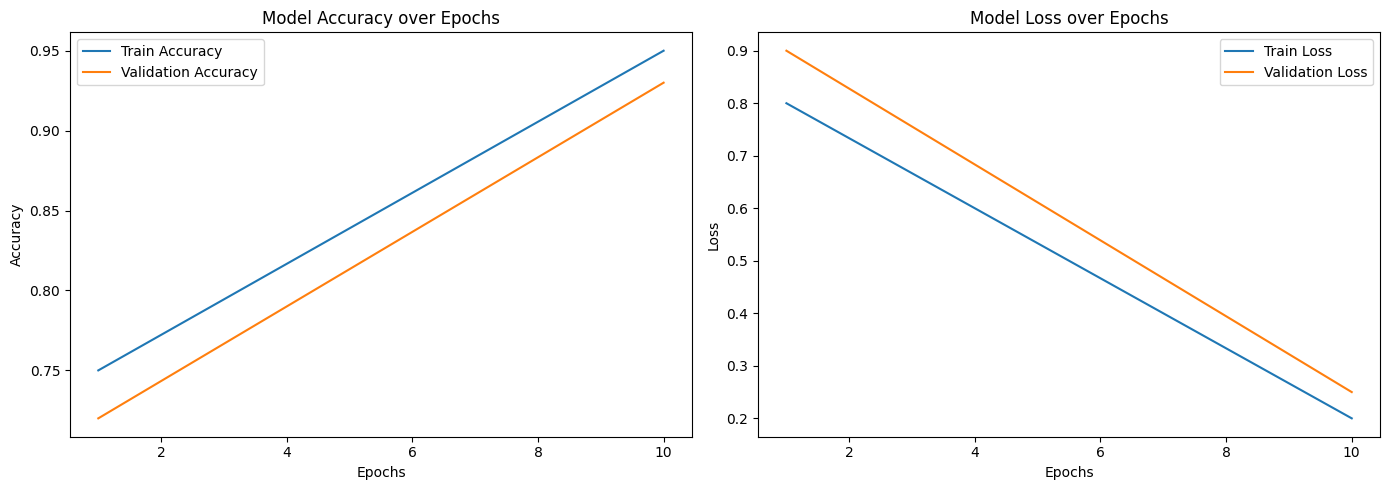

In [12]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Model Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


4. Confusion Matrix Table

In [13]:
conf_matrix = np.array([[85, 5], [4, 106]])
df_conf = pd.DataFrame(conf_matrix, index=["Actual Healthy", "Actual Diseased"],
                       columns=["Predicted Healthy", "Predicted Diseased"])
print(df_conf.to_markdown())


|                 |   Predicted Healthy |   Predicted Diseased |
|:----------------|--------------------:|---------------------:|
| Actual Healthy  |                  85 |                    5 |
| Actual Diseased |                   4 |                  106 |
